**TASK 1 - ANALYSIS**


################## ANIME.CSV ANALYSIS ################## 

Number of columns in anime.csv:  7
Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

Number of rows in anime.csv:  12294

Number of duplicate anime_id in anime.csv:  0

Number of unique genre: 43
Unique genre: ['Drama' 'Romance' 'School' 'Supernatural' 'Action' 'Adventure' 'Fantasy'
 'Magic' 'Military' 'Shounen' 'Comedy' 'Historical' 'Parody' 'Samurai'
 'Sci-Fi' 'Thriller' 'Sports' 'Super Power' 'Space' 'Slice of Life'
 'Mecha' 'Music' 'Mystery' 'Seinen' 'Martial Arts' 'Vampire' 'Shoujo'
 'Horror' 'Police' 'Psychological' 'Demons' 'Ecchi' 'Josei' 'Shounen Ai'
 'Game' 'Dementia' 'Harem' 'Cars' 'Kids' 'Shoujo Ai' 'Hentai' 'Yaoi'
 'Yuri']

Number of unique type: 6
Unique type: ['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA']

Number of rows with missing values in anime.csv:  277

Rows with missing values in anime.csv:
       anime_id                                       name genre     type

C:\Users\mirna.saad\AppData\Local\Temp\ipykernel_27040\2573631928.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


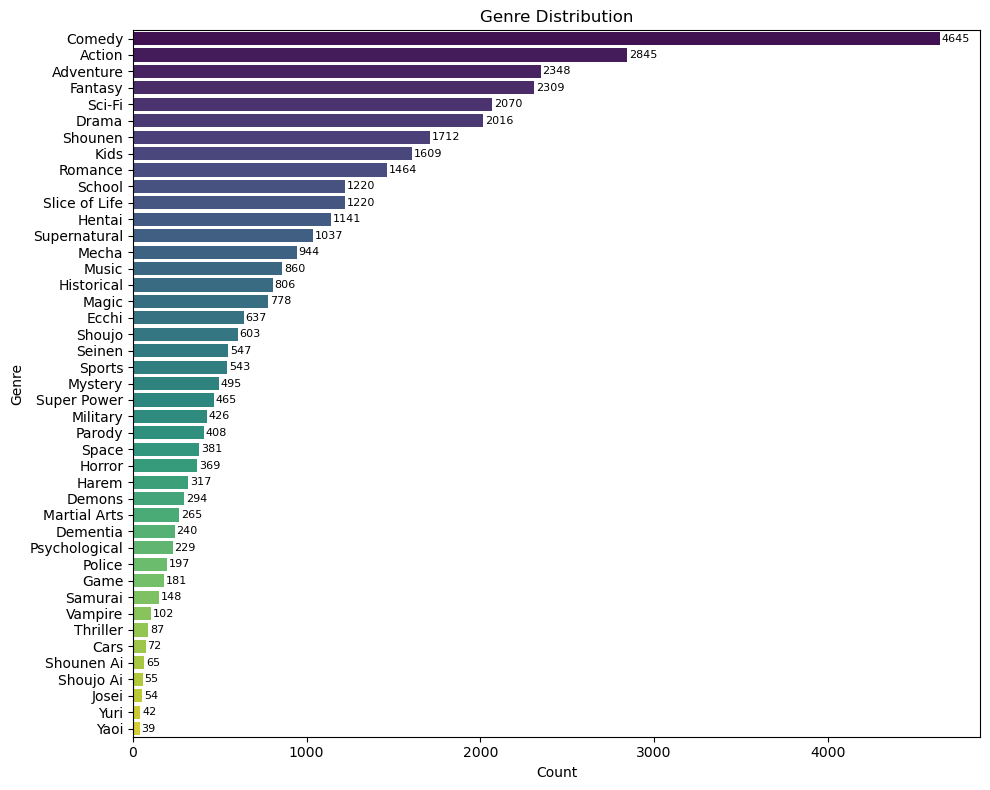

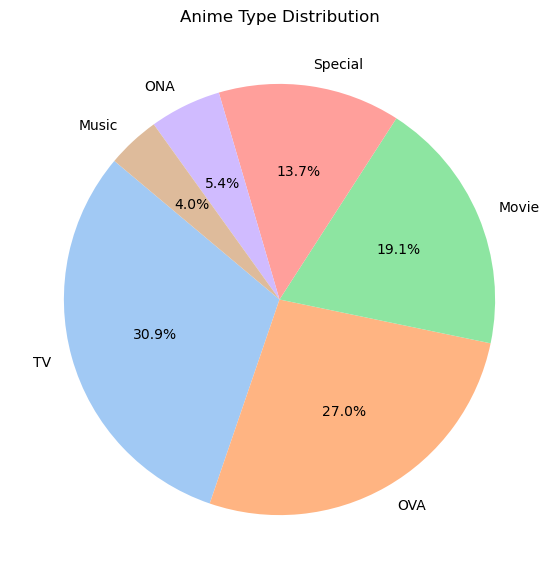

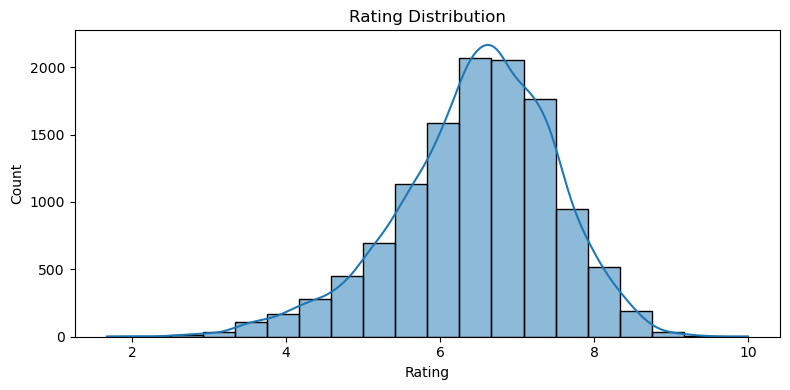


Outliers in 'rating' using IQR method: 229

Outliers in 'episodes' using IQR method: 1123

Outliers in 'members' using IQR method: 1900


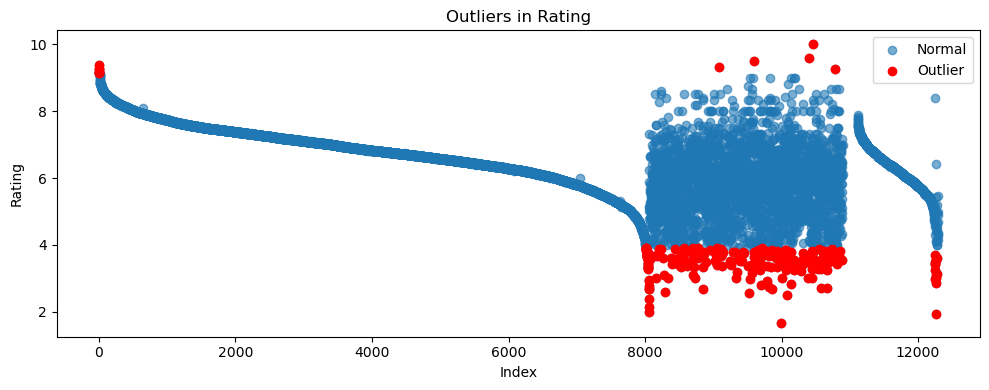

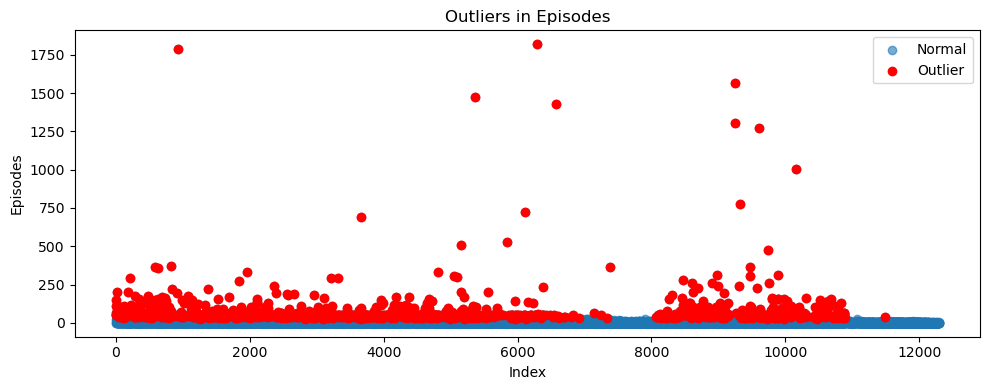

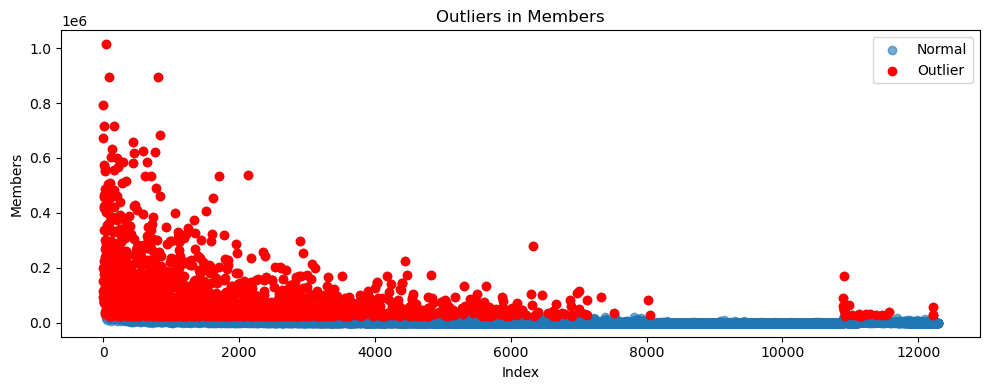

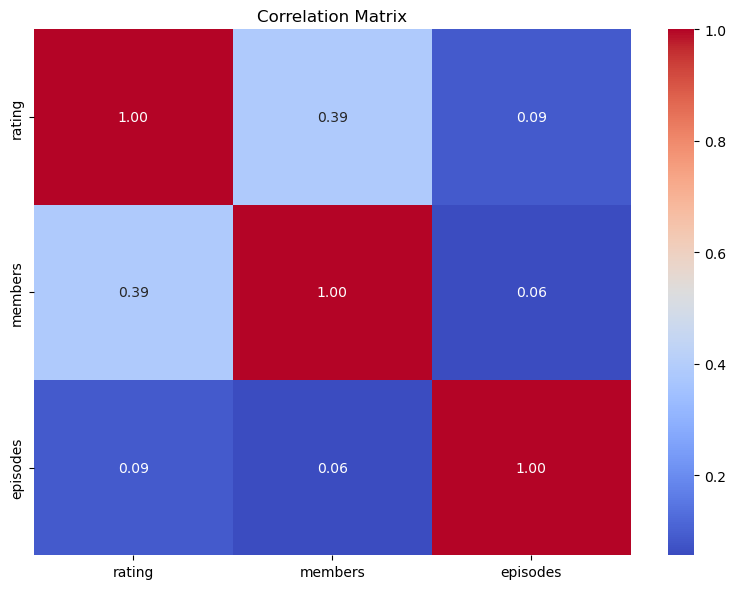


################## RATING.CSV ANALYSIS ################## 

Number of columns in rating.csv:  3
Index(['user_id', 'anime_id', 'rating'], dtype='object')

Number of rows in rating.csv:  7813737

Number of duplicate anime_id in rating.csv:  7802537

Number of unique users in rating.csv:  73515

Number of rows with missing values in rating.csv:  0

Number of rows with -1 as rating in rating.csv:  1476496

Standard descriptive statistics for rating.csv:
             user_id      anime_id        rating
count  7.813737e+06  7.813737e+06  7.813737e+06
mean   3.672796e+04  8.909072e+03  6.144030e+00
std    2.099795e+04  8.883950e+03  3.727800e+00
min    1.000000e+00  1.000000e+00 -1.000000e+00
25%    1.897400e+04  1.240000e+03  6.000000e+00
50%    3.679100e+04  6.213000e+03  7.000000e+00
75%    5.475700e+04  1.409300e+04  9.000000e+00
max    7.351600e+04  3.451900e+04  1.000000e+01


C:\Users\mirna.saad\AppData\Local\Temp\ipykernel_27040\2573631928.py:193: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rating_df['rating'], palette='viridis')


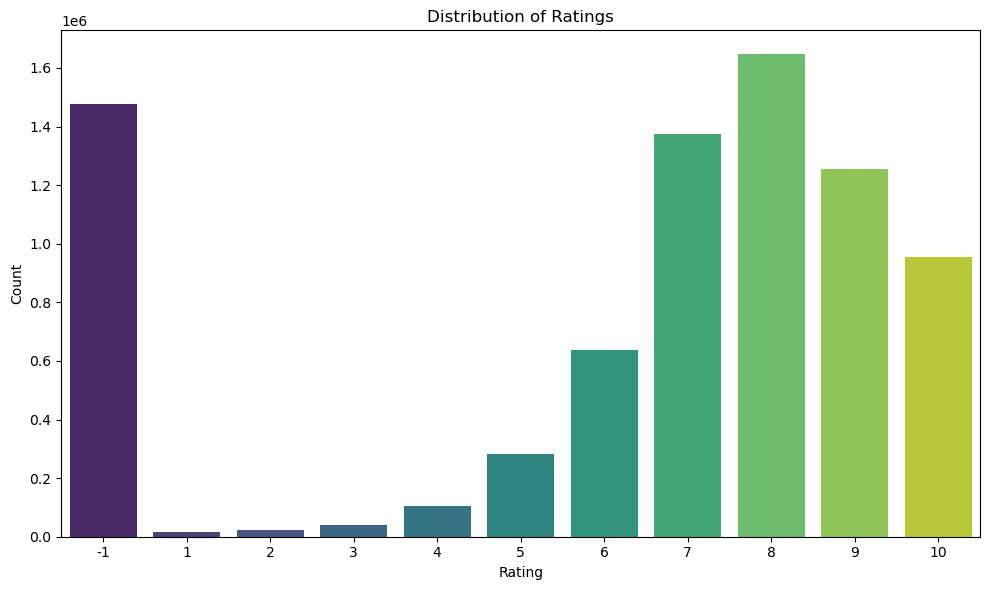

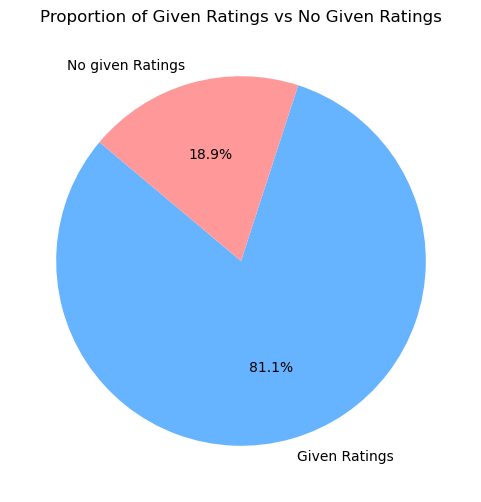


Outliers in 'rating' using IQR method: 1493145


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

############### Helper functions ###############

def count_unique_elements(df: pd.DataFrame, col: str):
    col_series = df[col].dropna()
    all_different_value_col = col_series.str.split(',').explode().str.strip() # Split each genre string by comma and flatten the list
    unique_value_col = all_different_value_col.unique()
    print(f"\nNumber of unique {col}:", len(unique_value_col))
    print(f"Unique {col}:", unique_value_col)
    return unique_value_col, len(unique_value_col)

def detect_outliers_iqr(df: pd.DataFrame, column: str):
    data = df[column].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"\nOutliers in '{column}' using IQR method: {len(outliers)}")
    return outliers

def plot_outliers(df: pd.DataFrame, column: str, outliers: pd.DataFrame):
    plt.figure(figsize=(10, 4))
    plt.scatter(df.index, df[column], label='Normal', alpha=0.6)
    plt.scatter(outliers.index, outliers[column], color='red', label='Outlier')
    plt.xlabel('Index')
    plt.ylabel(column.capitalize())
    plt.title(f"Outliers in {column.capitalize()}")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'images/outliers_{column}_scatter.png')
    plt.show()

######################################################################
############### TASK 1 (Explore and describe the data) ###############
######################################################################
 
# --------- Analyze anime.csv --------- 

print("################## ANIME.CSV ANALYSIS ################## ")
# 1. Load the dataset
anime_df = pd.read_csv('data/anime.csv')
# 2. Basic checks
print("\nNumber of columns in anime.csv: ", len(anime_df.columns))
print(anime_df.columns)
print("\nNumber of rows in anime.csv: ", len(anime_df))
# check if anime_id contains duplicates
anime_id_duplicates = anime_df['anime_id'].duplicated().sum()
print("\nNumber of duplicate anime_id in anime.csv: ", anime_id_duplicates)
# check unique genres
unique_genres, unique_genres_count = count_unique_elements(anime_df, 'genre')
# check unique type
unique_type, unique_type_count = count_unique_elements(anime_df, 'type')
# check rows that contain missing values, if same row has multiple missing values count only once
missing_values = anime_df.isnull().sum(axis=1) > 0
missing_values_count = missing_values.sum()
print("\nNumber of rows with missing values in anime.csv: ", missing_values_count)
print("\nRows with missing values in anime.csv:\n", anime_df[missing_values].head(5))
# check col with most missing values
missing_values_count = anime_df.isnull().sum()
missing_values_count = missing_values_count[missing_values_count > 0]
missing_values_count = missing_values_count.sort_values(ascending=False)
print("\nColumns with missing values in anime.csv:\n", missing_values_count)
# check cols with 'Unknown' as value
unknown_values_count = anime_df.isin(['Unknown']).sum()
unknown_values_count = unknown_values_count[unknown_values_count > 0]
unknown_values_count = unknown_values_count.sort_values(ascending=False)
print("\nColumns with 'Unknown' as value in anime.csv:\n", unknown_values_count)
# check anime with most episodes, ignore the ones with 'Unknown' as value
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'], errors='coerce')
most_episodes = anime_df[anime_df['episodes'] != 'Unknown'].sort_values(by='episodes', ascending=False).head(3)
print("\nTop 3 anime with most episodes:\n", most_episodes)
# chec anime with least episodes, ignore the ones with 'Unknwon' as value and 1 episode (film)
least_episodes = anime_df[anime_df['episodes'] != 'Unknown']
least_episodes = least_episodes[least_episodes['episodes'] != 1]
least_episodes = least_episodes.sort_values(by='episodes', ascending=True).head(3)
print("\nTop 3 anime with least episodes:\n", least_episodes)
# check anime with most members
anime_df['members'] = pd.to_numeric(anime_df['members'], errors='coerce')
most_members = anime_df.sort_values(by='members', ascending=False).head(3)
print("\nTop 3 anime with most members:\n", most_members)
# check anime with least members
least_members = anime_df[anime_df['members'] != 'Unknown']
least_members = least_members[least_members['members'] != 0]
least_members = least_members.sort_values(by='members', ascending=True).head(3)
print("\nTop 3 anime with least members:\n", least_members)
# check anime with highest rating
anime_df['rating'] = pd.to_numeric(anime_df['rating'], errors='coerce')
highest_rating = anime_df.sort_values(by='rating', ascending=False).head(3)
print("\nTop 3 anime with highest rating:\n", highest_rating)
# check anime with lowest rating
lowest_rating = anime_df[anime_df['rating'] != 0]
lowest_rating = lowest_rating.sort_values(by='rating', ascending=True).head(3)
print("\nTop 3 anime with lowest rating:\n", lowest_rating)
# 3. Standard descriptive statistics
print("\nStandard descriptive statistics for anime.csv:\n", anime_df.describe())
# 4. Variable visualization
# Genre distribution
genre_counts = anime_df['genre'].str.split(',').explode().str.strip().value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(
    y=genre_counts.index,
    x=genre_counts.values,
    palette='viridis'
)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Genre Distribution')
for i, v in enumerate(genre_counts.values):
    plt.text(v + 10, i, str(v), color='black', va='center', fontsize=8)
plt.tight_layout()
plt.savefig('images/genre_distribution_improved.png')
plt.show()
# Type distribution
type_counts = anime_df['type'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title('Anime Type Distribution')
plt.savefig('images/type_distribution_improved.png')
plt.show()
# Rating distribution
plt.figure(figsize=(8, 4))
sns.histplot(anime_df['rating'].dropna(), bins=20, kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.tight_layout()
plt.savefig('images/rating_distribution_1.png')
plt.show()

# 5. Outliers
# Detect outliers
rating_outliers = detect_outliers_iqr(anime_df, 'rating')
episode_outliers = detect_outliers_iqr(anime_df, 'episodes')
members_outliers = detect_outliers_iqr(anime_df, 'members')
# Plot outliers
plot_outliers(anime_df, 'rating', rating_outliers)
plot_outliers(anime_df, 'episodes', episode_outliers)
plot_outliers(anime_df, 'members', members_outliers)

# 6. Correlation matrix
correlation_matrix = anime_df[['rating', 'members', 'episodes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('images/correlation_matrix.png')
plt.show()


# --------- Analyze rating.csv --------- 

print("\n################## RATING.CSV ANALYSIS ################## ")
# 1. Load the dataset
rating_df = pd.read_csv('data/rating.csv') 
# 2. Basic checks
print("\nNumber of columns in rating.csv: ", len(rating_df.columns))
print(rating_df.columns)
print("\nNumber of rows in rating.csv: ", len(rating_df))
# check if anime_id contains duplicates
rating_anime_id_duplicates = rating_df['anime_id'].duplicated().sum()
print("\nNumber of duplicate anime_id in rating.csv: ", rating_anime_id_duplicates)
#  check unique users 
unique_userd = rating_df['user_id'].nunique()
print("\nNumber of unique users in rating.csv: ", unique_userd)
# check rows that contain missing values, if same row has multiple missing values count only once
missing_values = rating_df.isnull().sum(axis=1) > 0
missing_values_count = missing_values.sum()
print("\nNumber of rows with missing values in rating.csv: ", missing_values_count)
# check number of rows with -1 as rating
rating_df['rating'] = pd.to_numeric(rating_df['rating'], errors='coerce')
rating_minus_1 = rating_df[rating_df['rating'] == -1]
rating_minus_1_count = rating_minus_1.shape[0]
print("\nNumber of rows with -1 as rating in rating.csv: ", rating_minus_1_count)
# 3. Standard descriptive statistics
print("\nStandard descriptive statistics for rating.csv:\n", rating_df.describe())
# 4. Variable visualization
# Rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=rating_df['rating'], palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('images/rating_distribution.png')
plt.show()

# Proportion of valid ratings vs -1 ratings
total = len(rating_df)
minus_1 = rating_minus_1_count
valid = total - minus_1

plt.figure(figsize=(6, 6))
plt.pie(
    [valid, minus_1],
    labels=['Given Ratings', 'No given Ratings'],
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999'],
    startangle=140
)
plt.title('Proportion of Given Ratings vs No Given Ratings')
plt.savefig('images/valid_vs_minus1_ratings.png')
plt.show()

# 5. Outliers
# Detect outliers
rating_outliers = detect_outliers_iqr(rating_df, 'rating')

**TASK 2 - PREPROCESSING**

In [10]:
######################################################################
############### TASK 2 (Preprocessing) ###############
######################################################################

anime_df = pd.read_csv('data/anime.csv')
rating_df = pd.read_csv('data/rating.csv')

# --------- Preprocess anime.csv ---------
print("\n################## ANIME.CSV PREPROCESSING ################## ")

# 1. Handle 'episodes'
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'], errors='coerce')
print("\nMissing values in 'episodes' before filling:")
print(anime_df['episodes'].isnull().sum())
median_episodes = anime_df['episodes'].median()
print(f"Median episodes: {median_episodes}")
anime_df.fillna({'episodes': median_episodes}, inplace=True) # Fill NaN values with median
print("Missing values in 'episodes' after filling:")
print(anime_df['episodes'].isnull().sum())

# 2. Handle 'genre'
print("\nMissing values in 'genre' before filling:")
print(anime_df['genre'].isnull().sum())
anime_df.fillna({'genre': 'Unknown'}, inplace=True) # Fill NaN values with 'Unknown'
anime_df['genre'] = anime_df['genre'].str.split(', ')
anime_df['genre'] = anime_df['genre'].apply(lambda x: [i.strip() for i in x]) # Strip whitespace from each genre
print("Missing values in 'genre' after filling:")
print(anime_df['genre'].isnull().sum())

# 3. Handle 'type'
print("\nMissing values in 'type' before filling:")
print(anime_df['type'].isnull().sum())
mode_type = anime_df['type'].mode()[0]
print(f"Mode type: {mode_type}")
anime_df.fillna({'type': mode_type}, inplace=True) # Fill NaN values with mode
print("Missing values in 'type' after filling:")
print(anime_df['type'].isnull().sum())

# Handle 'rating'
print("\nMissing values in 'rating' before filling:")
print(anime_df['rating'].isnull().sum())
mean_rating = anime_df['rating'].mean()
print(f"Mean rating: {mean_rating}")
anime_df.fillna({'rating': mean_rating}, inplace=True) # Fill NaN values with mean
print("Missing values in 'rating' after filling:")
print(anime_df['rating'].isnull().sum())

# --- Preprocess rating.csv ---
# Handle -1 as missing ratings
rating_df.replace({-1: np.nan}, inplace=True)
# drop rows with NaN ratings
print("\nMissing values in 'rating' before dropping:")
print(rating_df['rating'].isnull().sum())
rating_df.dropna(subset=['rating'], inplace=True)
print("Missing values in 'rating' after dropping:")
print(rating_df['rating'].isnull().sum())

# Drop duplicate ratings if any
# Count and show duplicated ratings
duplicates = rating_df[rating_df.duplicated(subset=['user_id', 'anime_id'], keep=False)]
duplicate_counts = duplicates.groupby(['user_id', 'anime_id']).size().reset_index(name='count')
duplicate_counts = duplicate_counts[duplicate_counts['count'] > 1]

print("\nNumber of duplicate ratings before dropping:", len(duplicates) // 2)
print("Duplicate rows and their counts:")
print(duplicate_counts)
rating_df.drop_duplicates(subset=['user_id', 'anime_id'], inplace=True)


################## ANIME.CSV PREPROCESSING ################## 

Missing values in 'episodes' before filling:
340
Median episodes: 2.0
Missing values in 'episodes' after filling:
0

Missing values in 'genre' before filling:
62
Missing values in 'genre' after filling:
0

Missing values in 'type' before filling:
25
Mode type: TV
Missing values in 'type' after filling:
0

Missing values in 'rating' before filling:
230
Mean rating: 6.473901690981432
Missing values in 'rating' after filling:
0

Missing values in 'rating' before dropping:
1476496
Missing values in 'rating' after dropping:
0

Number of duplicate ratings before dropping: 7
Duplicate rows and their counts:
   user_id  anime_id  count
0    42653      1575      2
1    42653      2001      2
2    42653     11757      2
3    42653     16498      2
4    42653     20507      2
5    42653     22319      2
6    42653     23283      2


# Content-based anime recommendation

In [11]:
df = anime_df.merge(rating_df, how = "left", on = ["anime_id"])
df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1.0,9.37,200630,99.0,5.0
1,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1.0,9.37,200630,152.0,10.0
2,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1.0,9.37,200630,244.0,10.0
3,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1.0,9.37,200630,271.0,10.0
4,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1.0,9.37,200630,322.0,10.0


In [12]:
anime_data = anime_df.copy()
ratings_data = rating_df.copy() 

In [13]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from tabulate import tabulate

# ======================
# 1. Data Preparation
# ======================

def text_cleaning(text):
    """Clean anime titles by removing special characters"""
    if not isinstance(text, str):
        return ""
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    return text.strip()


# Clean data
anime_data['name'] = anime_data['name'].apply(text_cleaning)
anime_data['genre'] = anime_data['genre'].fillna('').astype(str)



In [36]:
anime_data['name'].head(25)

0                                        Kimi no Na wa.
1                      Fullmetal Alchemist: Brotherhood
2                                              Gintama°
3                                           Steins;Gate
4                                               Gintama
5     Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
6                                Hunter x Hunter (2011)
7                                  Ginga Eiyuu Densetsu
8     Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...
9                                    Gintama: Enchousen
10                                 Clannad: After Story
11                                       Koe no Katachi
12                                              Gintama
13                   Code Geass: Hangyaku no Lelouch R2
14                              Haikyuu!! Second Season
15                        Sen to Chihiro no Kamikakushi
16                              Shigatsu wa Kimi no Uso
17                        Mushishi Zoku Shou 2nd

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from tabulate import tabulate

# Split ratings into train and test sets
train_ratings, test_ratings = train_test_split(ratings_data, test_size=0.2, random_state=42)

# Filter anime_data to only include anime present in the training ratings
train_anime_ids = train_ratings['anime_id'].unique()
train_anime_data = anime_data[anime_data['anime_id'].isin(train_anime_ids)].copy()

# ======================
# Feature Engineering on Training Data
# ======================

# Create TF-IDF matrix for genres
tfv = TfidfVectorizer(min_df=2, max_features=None, 
                      strip_accents='unicode', analyzer='word',
                      token_pattern=r'\w{1,}', ngram_range=(1, 3),
                      stop_words='english')

tfv_matrix = tfv.fit_transform(train_anime_data['genre'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfv_matrix, tfv_matrix)

# Create mapping between titles and indices
indices = pd.Series(train_anime_data.index, index=train_anime_data['name']).drop_duplicates()


In [59]:
# ======================
# Recommendation Function
# ======================

def get_recommendations(title, cosine_sim=cosine_sim, anime_data=train_anime_data, indices=indices, top_n=5):
    if title not in indices:
        return pd.DataFrame()
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    anime_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]

    recommendations = anime_data.iloc[anime_indices].copy()
    recommendations['Similarity Score'] = similarity_scores
    return recommendations[['name', 'rating', 'genre', 'Similarity Score']].rename(columns={'name': 'Anime', 'rating': 'Rating'})



In [60]:
# ======================
# Evaluation Function
# ======================

def evaluate_for_anime(anime_name, test_ratings, anime_data, cosine_sim, indices, top_n=5):
    if anime_name not in indices:
        similar = anime_data[anime_data['name'].str.contains(anime_name, case=False)]['name'].head(5).tolist()
        print(f"\n'{anime_name}' not found in database.")
        if similar:
            print("Possible similar titles:")
            for t in similar:
                print(f"- {t}")
        return

    anime_id = anime_data[anime_data['name'] == anime_name]['anime_id'].values[0]
    high_raters = test_ratings[(test_ratings['anime_id'] == anime_id) & 
                               (test_ratings['rating'] >= 7)]['user_id'].unique()

    results = []
    for user_id in high_raters[:100]:  # Limit to first 100 users for speed
        user_likes = test_ratings[(test_ratings['user_id'] == user_id) &
                                  (test_ratings['rating'] >= 7) &
                                  (test_ratings['anime_id'] != anime_id)]['anime_id'].values

        if len(user_likes) == 0:
            continue

        recs = get_recommendations(anime_name, cosine_sim, anime_data, indices, top_n)
        if recs.empty:
            continue

        rec_anime_ids = anime_data[anime_data['name'].isin(recs['Anime'])]['anime_id'].values
        relevant_recs = len(set(rec_anime_ids) & set(user_likes))
        precision = relevant_recs / top_n

        results.append({
            'user_id': user_id,
            'precision': precision,
            'total_liked': len(user_likes)
        })

    if not results:
        print(f"\nInsufficient data to evaluate '{anime_name}'")
        return

    results_df = pd.DataFrame(results)
    print(f"\nEvaluation for '{anime_name}':")
    print(f"Users who liked this anime: {len(results_df)}")
    print(f"Average Precision: {results_df['precision'].mean():.4f}")
    return results_df



In [61]:
# ======================
# Apply for a Specific Anime Fullmetal Alchemist: Brotherhood
# ======================

target_anime = "Fullmetal Alchemist: Brotherhood"

recs = get_recommendations(target_anime)

if not recs.empty:
    print("\nRecommendations:")
    print(tabulate(recs, headers='keys', tablefmt='psql', showindex=False))

# Evaluate recommendations on the test set
evaluation_results = evaluate_for_anime(target_anime, test_ratings, train_anime_data, cosine_sim, indices)



Recommendations:
+-----------------------------------------------+----------+---------------------------------------------------------------------------------------+--------------------+
| Anime                                         |   Rating | genre                                                                                 |   Similarity Score |
|-----------------------------------------------+----------+---------------------------------------------------------------------------------------+--------------------|
| Fullmetal Alchemist: Brotherhood Specials     |     8.11 | ['Adventure', 'Drama', 'Fantasy', 'Magic', 'Military', 'Shounen']                     |           0.948303 |
| Fullmetal Alchemist                           |     8.33 | ['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Magic', 'Military', 'Shounen'] |           0.799551 |
| Fullmetal Alchemist: The Sacred Star of Milos |     7.5  | ['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Magic', 'Militar